<a href="https://colab.research.google.com/github/natalia7244/Machine-Learning-Exercises/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Celem jest stworzenie najlepszego modelu, który na podstawie różnych cech nieruchomości przewiduje cenę sprzedaży domu.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pl
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

WCZYTANIE I ANALIZA DANYCH

In [ ]:
melb_data_file_path = '/content/drive/MyDrive/melb_data.csv'
melb_data = pd.read_csv(melb_data_file_path)

In [ ]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


PREPROCESSING

In [ ]:
melb_data = melb_data.dropna(axis=0)

In [ ]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
y = melb_data.Price
melb_features = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
X = melb_data[melb_features]

In [ ]:
X.head()

,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
1,2,h,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
4,4,h,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0
6,3,h,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan,4019.0
7,2,h,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,Northern Metropolitan,4019.0


In [ ]:
X.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,9.751097,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,5.612065,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,5.900000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,9.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,12.400000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,47.400000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [ ]:
print(train_X.dtypes)

Rooms              int64
Type              object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [ ]:
label_encoder = LabelEncoder()
train_X['Type'] = label_encoder.fit_transform(train_X['Type'])
val_X['Type'] = label_encoder.transform(val_X['Type'])

train_X['Regionname'] = label_encoder.fit_transform(train_X['Regionname'])
val_X['Regionname'] = label_encoder.transform(val_X['Regionname'])

DRZEWO DECYZYJE - REGRESJA

In [ ]:
melb_model = DecisionTreeRegressor()
melb_model.fit(train_X, train_y)
val_predictions = melb_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

241073.00258231116


In [ ]:
for predictions, true in zip(val_predictions[:10], val_y[:10]):
    diff = abs(predictions - true)
    percent_error = (diff/ abs(true))* 100
    print('{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}%'.format(predictions, true, diff, percent_error ))

695000.00		620000.00		75000.00		12.10%
1394000.00		2320000.00		926000.00		39.91%
710000.00		750000.00		40000.00		5.33%
1300000.00		1120000.00		180000.00		16.07%
3550000.00		6500000.00		2950000.00		45.38%
900000.00		870000.00		30000.00		3.45%
850000.00		760000.00		90000.00		11.84%
1852000.00		2600000.00		748000.00		28.77%
1245000.00		830000.00		415000.00		50.00%
881000.00		1280000.00		399000.00		31.17%


WYKRES ROZRZUTU - DRZEWO DECYZYJNE



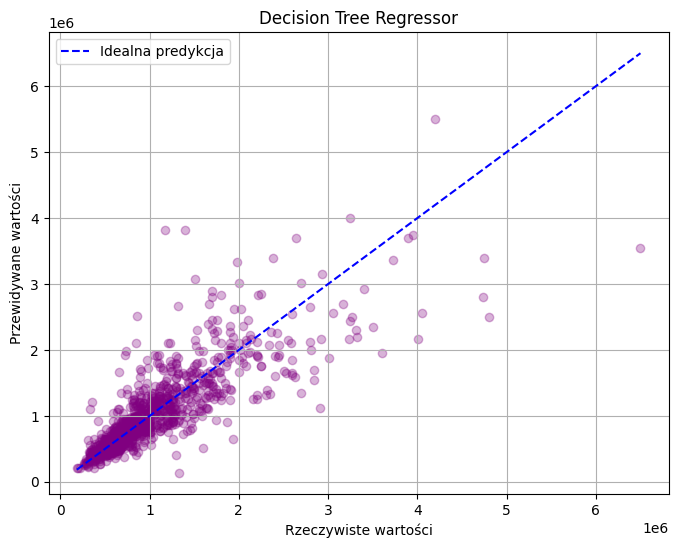

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(val_y[:1000], val_predictions[:1000], color='purple', alpha=0.3)
plt.plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'b--', label ='Idealna predykcja')
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Decision Tree Regressor")
plt.legend()
plt.grid(True)
plt.show()

HISTOGRAM BŁĘDÓW - DRZEWO DECYZYJNE

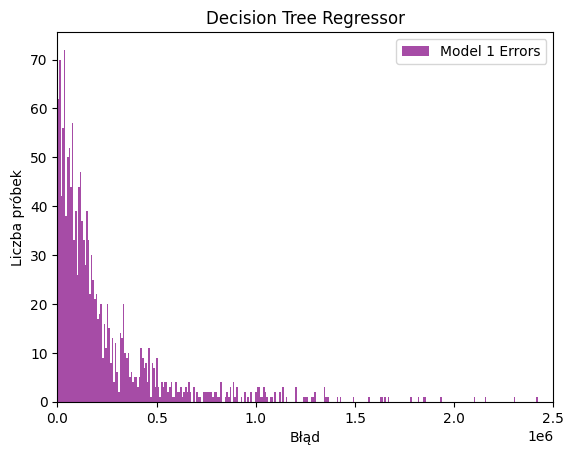

In [ ]:
errors1 = abs(val_y - val_predictions)
plt.hist(errors1, bins=1000, color='purple', alpha=0.7, label="Model 1 Errors")
plt.xlim(0, 2500000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

DRZEWO DECYZYJE - REGRESJA (MAX_LEAF_NODES)

In [ ]:
def get_mea(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 0)
    model.fit(train_X,train_y)
    pred_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, pred_val)
    return(mae)

for max_leaf_nodes in [10, 100, 500, 1000, 1500, 2000]:
    my_mea = get_mea(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print('Liczba liści: {:.2f} \t\t Sredni blad bezwzgledny: {:.2f}'.format(max_leaf_nodes,my_mea))

Liczba liści: 10.00 		 Sredni blad bezwzgledny: 295677.69
Liczba liści: 100.00 		 Sredni blad bezwzgledny: 235892.43
Liczba liści: 500.00 		 Sredni blad bezwzgledny: 231371.67
Liczba liści: 1000.00 		 Sredni blad bezwzgledny: 233807.80
Liczba liści: 1500.00 		 Sredni blad bezwzgledny: 237575.96
Liczba liści: 2000.00 		 Sredni blad bezwzgledny: 239327.91


In [ ]:
melb_model2 = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
melb_model2.fit(train_X, train_y)
val_predictions2 = melb_model2.predict(val_X)
print(mean_absolute_error(val_y,val_predictions2))

231371.66661419813


In [ ]:
for predictions, true in zip(val_predictions2[:10], val_y[:10]):
    diff = abs(predictions - true)
    percent_error = (diff/ abs(true))* 100
    print('{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}%'.format(predictions, true, diff, percent_error ))

641725.00		620000.00		21725.00		3.50%
1287166.67		2320000.00		1032833.33		44.52%
906200.00		750000.00		156200.00		20.83%
1430000.00		1120000.00		310000.00		27.68%
3550000.00		6500000.00		2950000.00		45.38%
999366.67		870000.00		129366.67		14.87%
719375.00		760000.00		40625.00		5.35%
1852000.00		2600000.00		748000.00		28.77%
1202454.55		830000.00		372454.55		44.87%
955500.00		1280000.00		324500.00		25.35%




---



WYKRES ROZRZUTU - MAX_LEAF_NODES

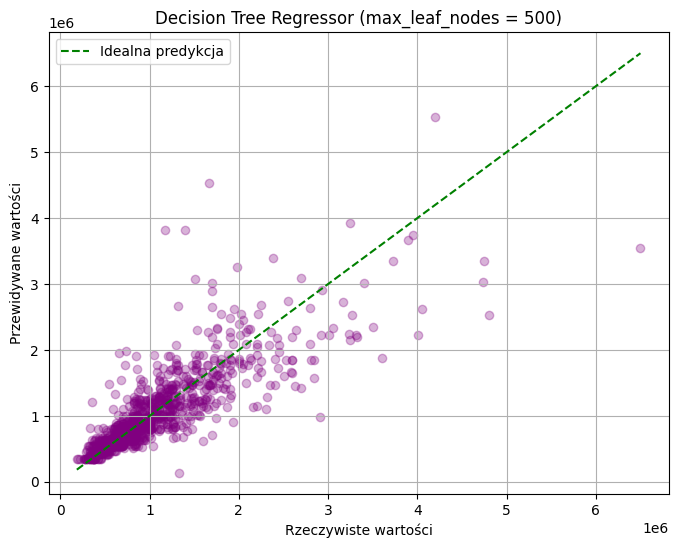

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(val_y[:1000], val_predictions2[:1000], color='purple', alpha=0.3)
plt.plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'g--', label ='Idealna predykcja')
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Decision Tree Regressor (max_leaf_nodes = 500)")
plt.legend()
plt.grid(True)
plt.show()

HISTOGRAM BŁĘDÓW - MAX_LEAF_NODES

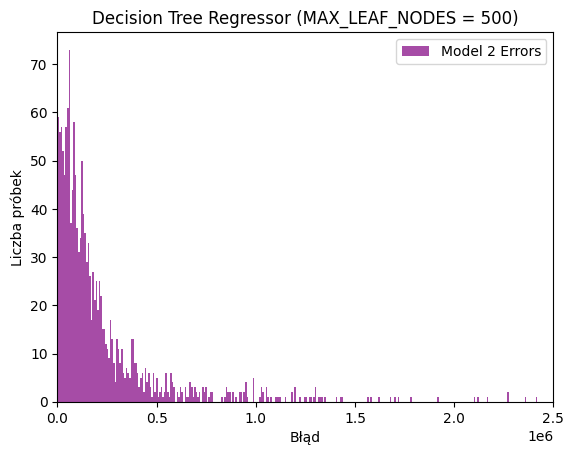

In [ ]:
errors2 = abs(val_y - val_predictions2)
plt.hist(errors2, bins=1000, color='purple', alpha=0.7, label="Model 2 Errors")
plt.xlim(0, 2500000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Decision Tree Regressor (MAX_LEAF_NODES = 500)')
plt.legend()
plt.show()

RANDOM FORESTS

In [ ]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)
val_predictions3 = forest_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions3))

169967.53157029112


In [ ]:
for predictions, true in zip(val_predictions3[:10], val_y[:10]):
    diff = abs(predictions - true)
    percent_error = (diff/ abs(true))* 100
    print('{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}%'.format(predictions, true, diff, percent_error ))

650043.00		620000.00		30043.00		4.85%
1684375.00		2320000.00		635625.00		27.40%
975120.00		750000.00		225120.00		30.02%
1563605.00		1120000.00		443605.00		39.61%
3697960.00		6500000.00		2802040.00		43.11%
1071900.00		870000.00		201900.00		23.21%
808745.00		760000.00		48745.00		6.41%
1686487.50		2600000.00		913512.50		35.14%
1134470.00		830000.00		304470.00		36.68%
1120060.00		1280000.00		159940.00		12.50%


WYKRES ROZRZUTU - RANDOM FOREST

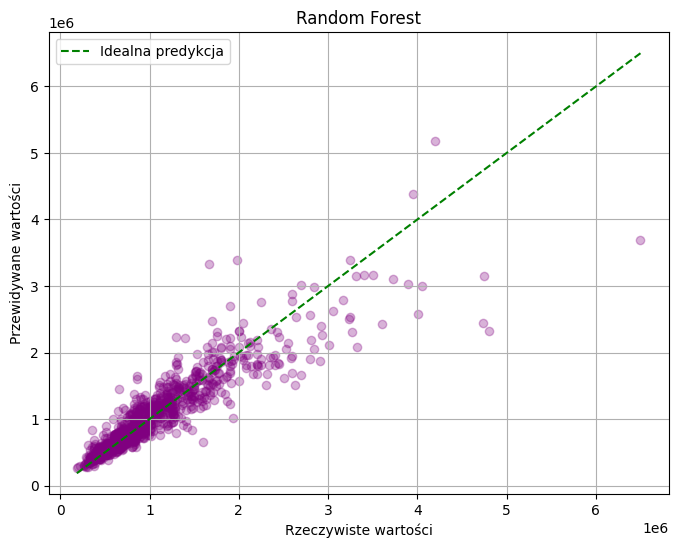

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(val_y[:1000], val_predictions3[:1000], color='purple', alpha=0.3)
plt.plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'g--', label ='Idealna predykcja')
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Random Forest")
plt.legend()
plt.grid(True)
plt.show()

HISTOGRAM BŁĘDÓW - RANDOM FOREST

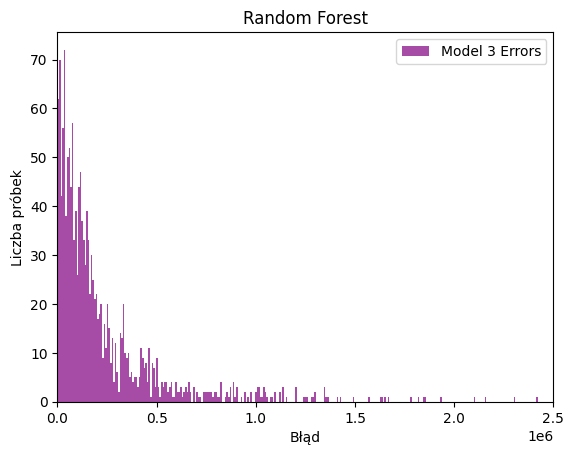

In [ ]:
errors3 = abs(val_y - val_predictions)
plt.hist(errors3, bins=1000, color='purple', alpha=0.7, label="Model 3 Errors")
plt.xlim(0, 2500000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Random Forest')
plt.legend()
plt.show()

PORÓWNANIE MODELI

In [ ]:
print('Średni błąd predykcji dla drzewa decyzyjnego:',  mean_absolute_error(val_y,val_predictions))
print('Sredni bład predykcji dla drzewa decyzyjego dla liczby liści równej 500:', mean_absolute_error(val_y,val_predictions2))
print('Sredni bład predykcji dla Random Forest:', mean_absolute_error(val_y,val_predictions3))

Średni błąd predykcji dla drzewa decyzyjnego: 241073.00258231116
Sredni bład predykcji dla drzewa decyzyjego dla liczby liści równej 500: 231371.66661419813
Sredni bład predykcji dla Random Forest: 169967.53157029112


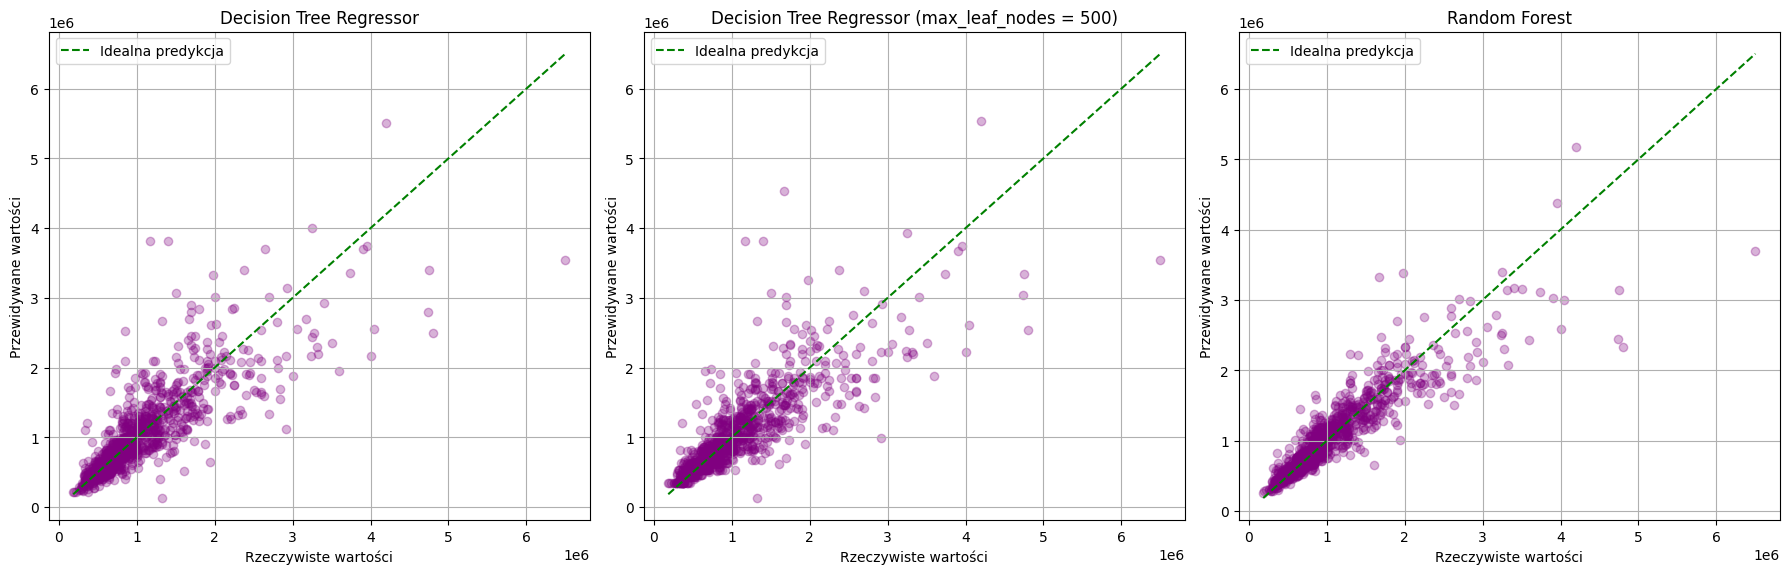

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Decision Tree Regressor
axes[0].scatter(val_y[:1000], val_predictions[:1000], color='purple', alpha=0.3)
axes[0].plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'g--', label='Idealna predykcja')
axes[0].set_xlabel("Rzeczywiste wartości")
axes[0].set_ylabel("Przewidywane wartości")
axes[0].set_title("Decision Tree Regressor")
axes[0].legend()
axes[0].grid(True)

# Decision Tree Regressor (max_leaf_nodes = 500)
axes[1].scatter(val_y[:1000], val_predictions2[:1000], color='purple', alpha=0.3)
axes[1].plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'g--', label='Idealna predykcja')
axes[1].set_xlabel("Rzeczywiste wartości")
axes[1].set_ylabel("Przewidywane wartości")
axes[1].set_title("Decision Tree Regressor (max_leaf_nodes = 500)")
axes[1].legend()
axes[1].grid(True)

#  Random Forest
axes[2].scatter(val_y[:1000], val_predictions3[:1000], color='purple', alpha=0.3)
axes[2].plot([min(val_y[:1000]), max(val_y[:1000])], [min(val_y[:1000]), max(val_y[:1000])], 'g--', label='Idealna predykcja')
axes[2].set_xlabel("Rzeczywiste wartości")
axes[2].set_ylabel("Przewidywane wartości")
axes[2].set_title("Random Forest")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

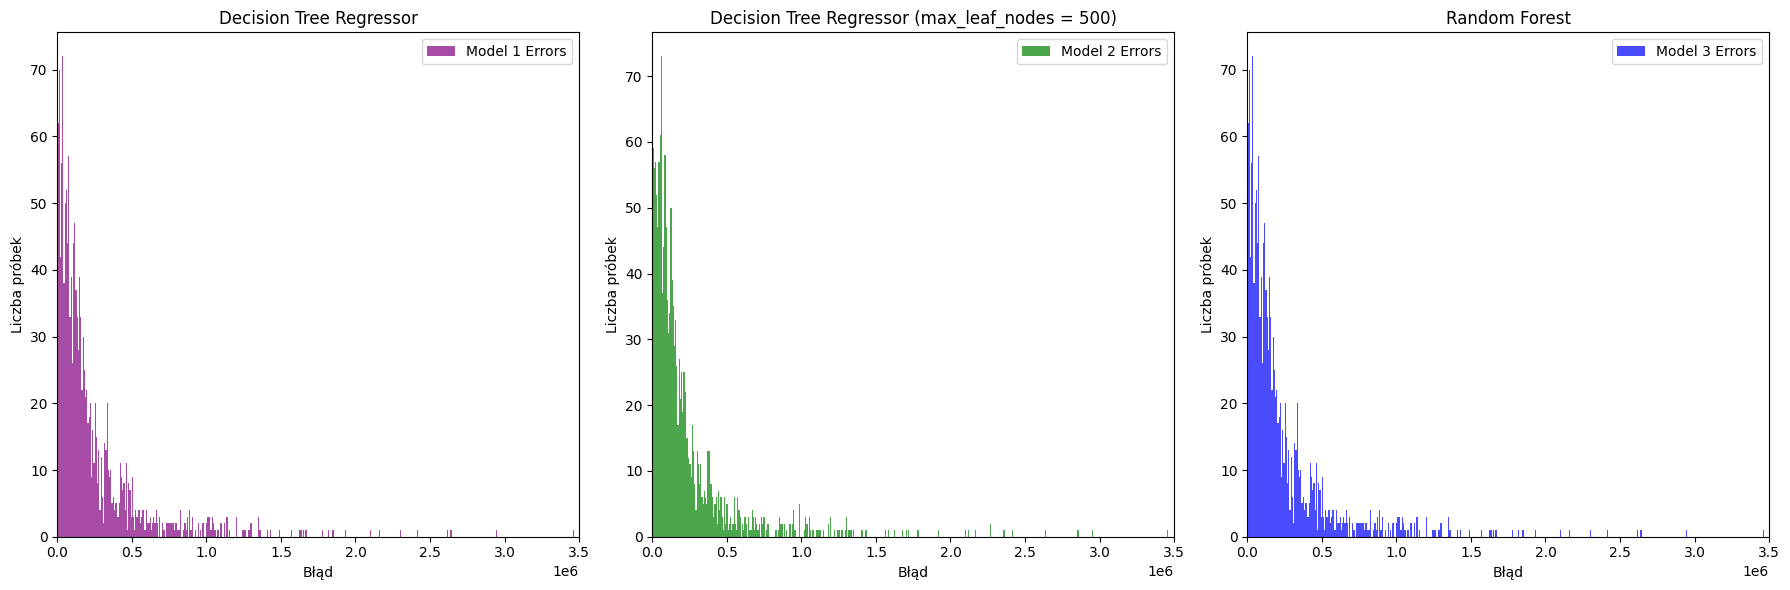

In [ ]:
plt.figure(figsize=(18, 6))

# Pierwszy histogram
plt.subplot(1, 3, 1)
plt.hist(errors1, bins=1000, color='purple', alpha=0.7, label="Model 1 Errors")
plt.xlim(0, 3500000)
#plt.ylim(0, 1000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Decision Tree Regressor')
plt.legend()

# Drugi histogram
plt.subplot(1, 3, 2)
plt.hist(errors2, bins=1000, color='green', alpha=0.7, label="Model 2 Errors")
plt.xlim(0, 3500000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Decision Tree Regressor (max_leaf_nodes = 500)')
plt.legend()

# Trzeci histogram
plt.subplot(1, 3, 3)
plt.hist(errors3, bins=1000, color='blue', alpha=0.7, label="Model 3 Errors")
plt.xlim(0, 3500000)
plt.xlabel('Błąd')
plt.ylabel('Liczba próbek')
plt.title('Random Forest')
plt.legend()


plt.tight_layout()
plt.show()

Wskaźnik dobrego dopasowania:

In [ ]:
r2 = r2_score(val_y, val_predictions)
print(f"Drzewo decyzyjne: {r2:.3f}")

r3 = r2_score(val_y, val_predictions2)
print(f"Drzewo decyzyjne (max_leaf_nodes = 500): {r3:.3f}")

r4 = r2_score(val_y, val_predictions3)
print(f"Random Forest: {r4:.3f}")




Drzewo decyzyjne: 0.577
Drzewo decyzyjne (max_leaf_nodes = 500): 0.583
Random Forest: 0.741
